In [1]:
import pandas as pd
import glob

files = glob.glob("*.txt")

#files[0]
df1 = pd.read_csv(files[0], skiprows=3)
df1.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [2]:
# Overview of each
df1.info()
df1_cleaned = df1.dropna()
df = df1.drop_duplicates()

# Assuming your final DataFrame is called `final_summary`
df1_cleaned.to_csv('demo_cleaned.csv', index=False)

# Missing values check
print(df1.isnull().sum())
print(df1_cleaned)
print(df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB
client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64
       client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
0         83

In [3]:
mean_age = df1["clnt_age"].mean()
mode_age = df1["clnt_age"].mode()[0]
mean_num = df1["clnt_tenure_mnth"].mean()
print(f"Frequent age = {mode_age:.2f}")
print(f"Mean age = {mean_age:.2f}")
print(f"AVG usage in 6 months = {mean_num:.2f}")

Frequent age = 58.50
Mean age = 46.44
AVG usage in 6 months = 150.66


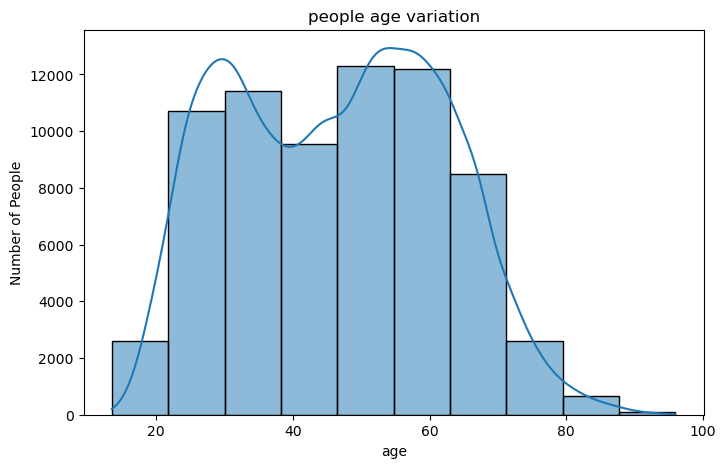

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df1['clnt_age'], bins=10, kde=True)
plt.title('people age variation')
plt.xlabel('age')
plt.ylabel('Number of People')
plt.show()

According to the analysis, I observed that the average age of the clients is 46.44 and the most frequest age distribution is of th client is 58.50. Which means that the profile of the people in the survey are abobe middle age. 

In [5]:
df2 = pd.read_csv(files[1])
df2.info()
df2_cleaned = df2.dropna()
df = df2.drop_duplicates()

# Assuming your final DataFrame is called `final_summary`
df2_cleaned.to_csv('exp_cleaned.csv', index=False)

print(df2_cleaned)
print(df)
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  70609 non-null  int64 
 1   Variation  50500 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB
       client_id Variation
0        9988021      Test
1        8320017      Test
2        4033851   Control
3        1982004      Test
4        9294070   Control
...          ...       ...
50495     393005   Control
50496    2908510   Control
50497    7230446      Test
50498    5230357      Test
50499    6334360      Test

[50500 rows x 2 columns]
       client_id Variation
0        9988021      Test
1        8320017      Test
2        4033851   Control
3        1982004      Test
4        9294070   Control
...          ...       ...
70604    2443347       NaN
70605    8788427       NaN
70606     266828       NaN
70607    1266421       NaN
70608    9895983       NaN

[70609 rows

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [6]:
df3 = pd.read_csv(files[2])
df3.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [7]:
df4 = pd.read_csv(files[3])
df4.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58


In [8]:
df_merged = pd.concat([df3, df4])
df_merged.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [9]:
# Total users who started
total_users = df_merged['visitor_id'].nunique()

# Users who reached the 'confirm' step
completed_users = df_merged[df_merged['process_step'] == 'confirm']['visitor_id'].nunique()

# Completion rate
completion_rate = completed_users / total_users * 100
print(f"Completion Rate: {completion_rate:.2f}%")

Completion Rate: 63.35%


In [10]:
df_merged['date_time'] = pd.to_datetime(df_merged['date_time'])

# Assuming your final DataFrame is called `final_summary`
df_merged.to_csv('df_merged_cleaned.csv', index=False)


# Calculate time spent per user per step
df_merged = df_merged.sort_values(by=['visitor_id', 'date_time'])
df_merged['time_spent'] = df_merged.groupby('visitor_id')['date_time'].diff()
df_merged.head(10)

,client_id,visitor_id,visit_id,process_step,date_time,time_spent
101148,5867343,100011869_84756704576,406596333_52561114200_989487,start,2017-06-05 02:47:42,NaT
101147,5867343,100011869_84756704576,406596333_52561114200_989487,step_1,2017-06-05 02:47:47,0 days 00:00:05
101146,5867343,100011869_84756704576,406596333_52561114200_989487,step_2,2017-06-05 02:48:03,0 days 00:00:16
101145,5867343,100011869_84756704576,406596333_52561114200_989487,step_3,2017-06-05 02:50:18,0 days 00:02:15
101144,5867343,100011869_84756704576,406596333_52561114200_989487,start,2017-06-05 02:51:11,0 days 00:00:53
101048,6265388,100019786_4272121951,703380671_89376183829_330646,start,2017-04-15 15:13:33,NaT
101047,6265388,100019786_4272121951,703380671_89376183829_330646,step_1,2017-04-15 15:13:46,0 days 00:00:13
101046,6265388,100019786_4272121951,703380671_89376183829_330646,step_2,2017-04-15 15:14:21,0 days 00:00:35
101045,6265388,100019786_4272121951,703380671_89376183829_330646,step_3,2017-04-15 15:15:50,0 days 00:01:29
101044,6265388,100019786_4272121951,703380671_89376183829_330646,confirm,2017-04-15 15:16:18,0 days 00:00:28


C:\Users\ugoch\AppData\Local\Temp\ipykernel_27168\4019182813.py:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final['completed'] = df_final['completed'].fillna(False)


📊 Completion Summary:
           completion_rate  n_users  n_completed
Variation                                       
Control                0.0    23532            0
Test                   0.0    26968            0

🧪 Hypothesis Test 1: Completion Rate (Test > Control)
T-statistic: nan
P-value: nan

📈 Observed uplift: nan%
❌ Uplift does NOT meet the 5% cost-effectiveness threshold.

🧪 Hypothesis Test 2: Age Difference Between Groups
T-statistic: nan
P-value: nan
       client_id Variation  completed
0        9988021      Test      False
1        8320017      Test      False
2        4033851   Control      False
3        1982004      Test      False
4        9294070   Control      False
...          ...       ...        ...
70604    2443347       NaN      False
70605    8788427       NaN      False
70606     266828       NaN      False
70607    1266421       NaN      False
70608    9895983       NaN      False

[70609 rows x 3 columns]


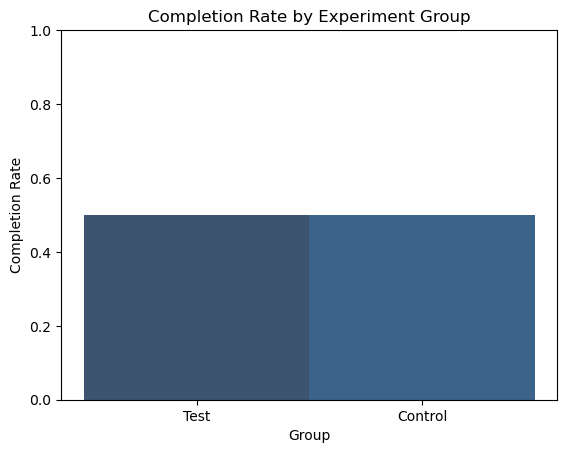

In [11]:
from scipy import stats

# --- Step 4: Merge All Data ---
df = df2.merge(df_merged, on='client_id', how='left')
df = df.merge(df1, on='client_id', how='left')

# --- Step 5: Determine Completion Status (did they reach 'complete') ---
completed = df[df['process_step'] == 'complete']
completed['completed'] = True
completion_status = completed[['client_id', 'completed']].drop_duplicates()

# Mark all other clients as not completed
df_final = df2.merge(completion_status, on='client_id', how='left')
df_final['completed'] = df_final['completed'].fillna(False)

summary = df_final.groupby('Variation')['completed'].agg(['mean', 'count', 'sum']).rename(columns={
    'mean': 'completion_rate',
    'count': 'n_users',
    'sum': 'n_completed'
})
print("📊 Completion Summary:")
print(summary)

test = df_final[df_final['Variation'] == 'test']['completed']
control = df_final[df_final['Variation'] == 'control']['completed']

t_stat, p_val = stats.ttest_ind(test, control, alternative='greater')
print("\n🧪 Hypothesis Test 1: Completion Rate (Test > Control)")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

uplift = test.mean() - control.mean()
print(f"\n📈 Observed uplift: {uplift:.4%}")
if uplift >= 0.05:
    print("✔️ Uplift meets the 5% cost-effectiveness threshold.")
else:
    print("❌ Uplift does NOT meet the 5% cost-effectiveness threshold.")

# --- Step 9: Bonus Hypothesis Test: Average Age Difference ---
age_test = df[df['Variation'] == 'test']['clnt_age'].dropna()
age_control = df[df['Variation'] == 'control']['clnt_age'].dropna()

t_age, p_age = stats.ttest_ind(age_test, age_control)
print("\n🧪 Hypothesis Test 2: Age Difference Between Groups")
print(f"T-statistic: {t_age:.4f}")
print(f"P-value: {p_age:.4f}")
print(df_final)

df_final.to_csv('df_final.csv', index=False)

# --- Optional: Visualize Completion Rates ---
sns.histplot(data=df_final, x='Variation', y='completed')
plt.title('Completion Rate by Experiment Group')
plt.ylabel('Completion Rate')
plt.xlabel('Group')
plt.ylim(0, 1)
plt.show()

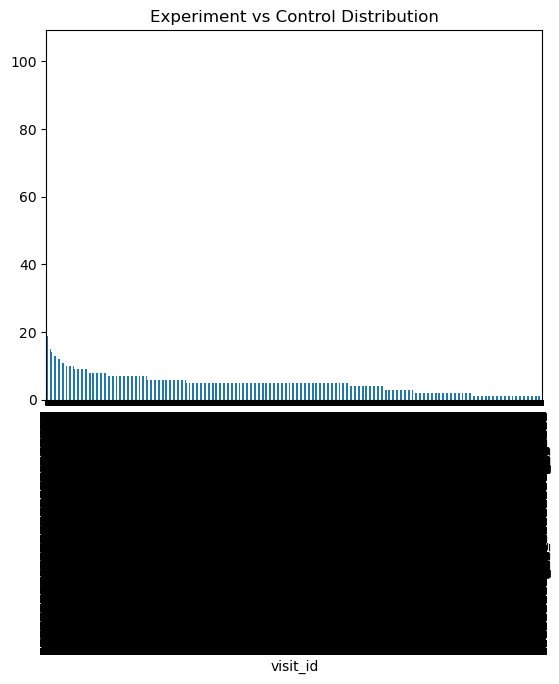

In [12]:
# 🔬 Merge experiment flag for group comparison

df_web = df_merged.merge(df2, on='client_id', how='left')  # assumes 'user_id' is common

# Now df_web includes experiment group information
df_merged['visit_id'].value_counts().plot(kind='bar')
plt.title("Experiment vs Control Distribution")
plt.show()

In [13]:
# Assume df_web is merged with 'group' column (test/control) and contains 'step_name'

# Users who completed the process
completed = df_merged[df_merged['process_step'] == 'confirm']

# Total users per group
group_counts = df_merged.groupby('client_id')['visitor_id'].nunique()
completion_counts = completed.groupby('client_id')['visitor_id'].nunique()

# Completion rates
completion_rates = completion_counts / group_counts
print(completion_rates)

client_id
169        1.000000
336             NaN
546        1.000000
555        1.000000
647        1.000000
             ...   
9999729    0.333333
9999768    1.000000
9999832         NaN
9999839    1.000000
9999875    1.000000
Name: visitor_id, Length: 120157, dtype: float64
